In [28]:
# Mengimpor library
import numpy as np #
import matplotlib.pyplot as plt # untuk visualisasi data
import pandas as pd # data processing, I/O file CSV
import seaborn as sns # untuk statistical Visual
from sklearn import preprocessing # digunakan untuk LabelEncoder()
from sklearn.model_selection import train_test_split # split data
from sklearn.preprocessing import StandardScaler # merubah skala data menjadi sama
from sklearn.svm import SVC # memanggil algoritma SVM
from sklearn.metrics import confusion_matrix # bentuk matrix
from matplotlib.colors import ListedColormap
 

In [30]:
#import datasetnya, lalu tampilkan 5 data teratas

dataset = pd.read_csv('/content/citrus.csv')
dataset.head() 

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [31]:
# cek dimensi dataset
dataset.shape

(10000, 6)

In [32]:
#cek missing values
dataset.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

cek informasi tentang dataset

In [33]:
dataset.info()
print("")
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB



name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

cek dimensi dari variable target

In [34]:
dataset['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

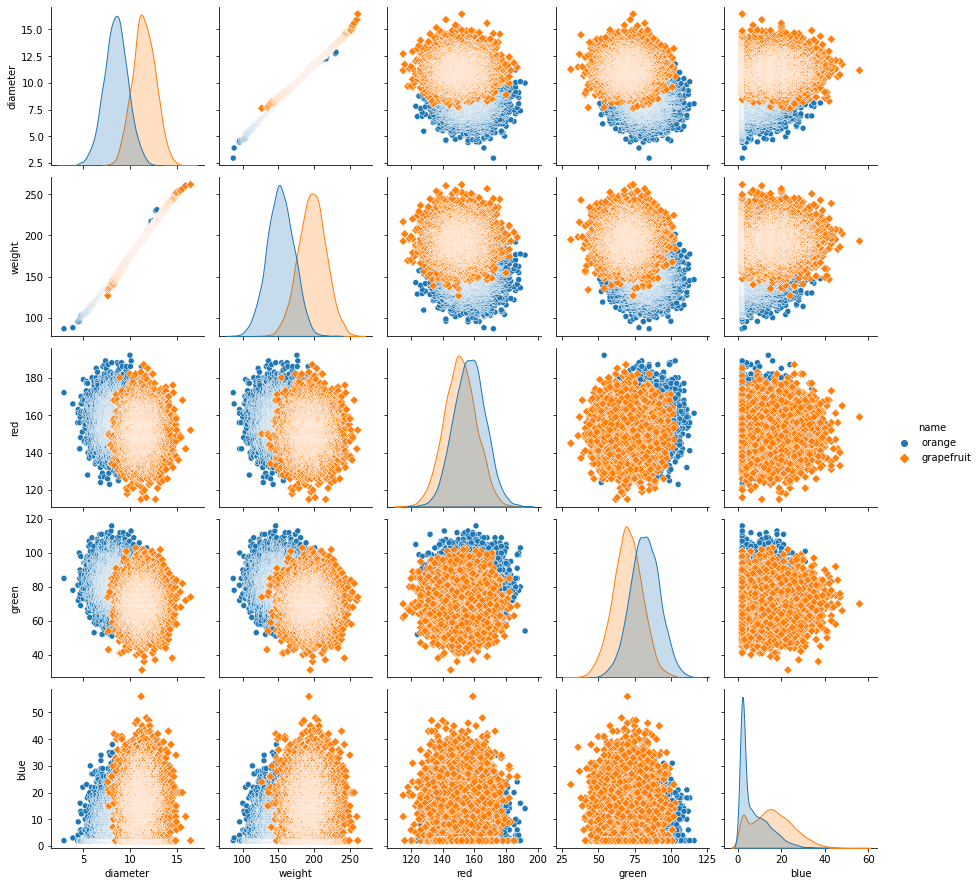

In [35]:
# melihat sebaran data pada dataset

%matplotlib inline
sns.pairplot(data=dataset, hue = 'name', kind='scatter', markers=["o", "D"])

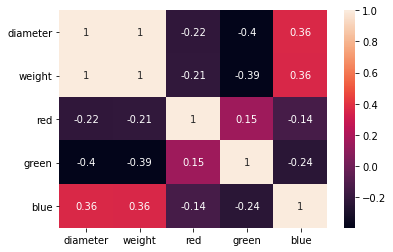

In [36]:
# melihat korelasi anatar setiap variabel dari datasetnya

sns.heatmap(dataset[["diameter",'weight', 'red','green', 'blue']].corr(), annot=True)

In [37]:
dataset.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [38]:
# konversi pada nilai yang bertipe data objek/string menjadi numerik, pada variabel target

from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
dataset['name']= label_encoder.fit_transform(dataset['name']) 
  
dataset['name'].unique()

array([1, 0])

In [39]:
# cek apakah sudah terkonversi

dataset['name']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int64

In [40]:
# Deklarasikan vektor fitur dan variabel target

X = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 0].values

In [41]:
d = pd.DataFrame(X)
d

,0,1,2,3,4
0,2.96,86.76,172.0,85.0,2.0
1,3.91,88.05,166.0,78.0,3.0
2,4.42,95.17,156.0,81.0,2.0
3,4.47,95.60,163.0,81.0,4.0
4,4.48,95.76,161.0,72.0,9.0
...,...,...,...,...,...
9995,15.35,253.89,149.0,77.0,20.0
9996,15.41,254.67,148.0,68.0,7.0
9997,15.59,256.50,168.0,82.0,20.0
9998,15.92,260.14,142.0,72.0,11.0


In [42]:
# split data menjadi data training dan data testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [43]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

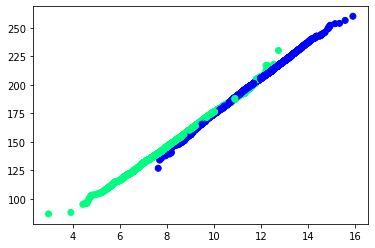

In [44]:
# merupakan hasil visualisasi dari DATA training yang telah di split

plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='winter' )

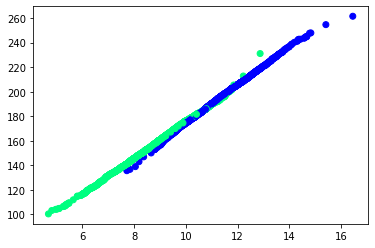

In [45]:
# merupakan hasil visualisasi dari DATA testing yang telah di split

plt.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='winter' )

In [46]:
# Feature Scaling : normalisasi data agar simpangan datanya tidak terlalu besar

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Membuat model SVM dan juga mnerapkan model svm tersebut ke data training

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0, C=100)
classifier.fit(X_train, y_train)
 

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [48]:
# Memprediksi hasil test set

from sklearn import metrics
y_pred = classifier.predict(X_test)
print("hasil akurasi :", metrics.accuracy_score(y_test,y_pred))

hasil akurasi : 0.9636


In [49]:
# Membuat confusion matrix, untuk melihat hasil model klasifikasi kita yang berhasil maupun yang gagal

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1216   21]
 [  70 1193]]


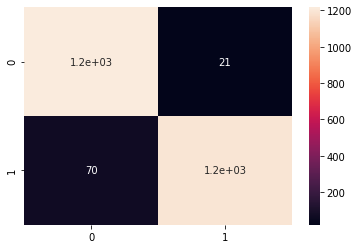

In [50]:
sns.heatmap(cm, annot=True)

In [51]:
from sklearn.metrics import classification_report

#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

acuracy: 0.9636
precision: 0.9827018121911038
recall 0.9445764053840063
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1237
           1       0.98      0.94      0.96      1263

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


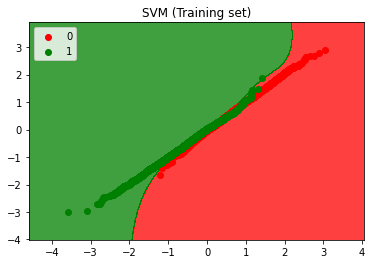

In [52]:
# Visualisasi hasil model SVM dari Training set

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.legend()
plt.show()
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


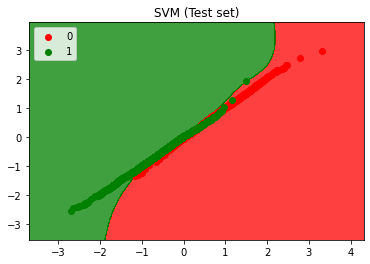

In [53]:
# Visualisasi model SVM terhadap Test set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.legend()
plt.show()